In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/archive (1)/Genre Classification Dataset/test_data_solution.txt'

with open(file_path, 'r') as files:
    content = files.read()

lines = content.strip().split('\n')

titles = []
genres = []
descriptions = []

for line in lines:
    parts = line.split(' ::: ')
    if len(parts) == 4:
        movie_id, title,genre, description = parts
        titles.append(title.strip())
        genres.append(genre.strip())
        descriptions.append(description.strip())

df = pd.DataFrame({
    'title': titles,
    'genre': genres,
    'description': descriptions
})

print(df)

                                title        genre  \
0                Edgar's Lunch (1998)     thriller   
1            La guerra de papá (1977)       comedy   
2         Off the Beaten Track (2010)  documentary   
3              Meu Amigo Hindu (2015)        drama   
4                   Er nu zhai (1955)        drama   
...                               ...          ...   
54195  "Tales of Light & Dark" (2013)       horror   
54196     Der letzte Mohikaner (1965)      western   
54197             Oliver Twink (2007)        adult   
54198               Slipstream (1973)        drama   
54199       Curitiba Zero Grau (2010)        drama   

                                             description  
0      L.R. Brane loves his life - his car, his apart...  
1      Spain, March 1964: Quico is a very naughty chi...  
2      One year in the life of Albin and his family o...  
3      His father has died, he hasn't spoken with his...  
4      Before he was known internationally as a marti...

In [ ]:
csv_path = '/content/drive/MyDrive/archive (1)/Genre Classification Dataset/test_data_solution.txt'

df.to_csv(csv_path, index=False)
df

,title,genre,description
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,Er nu zhai (1955),drama,Before he was known internationally as a marti...
...,...,...,...
54195,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Dar..."
54196,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their ...
54197,Oliver Twink (2007),adult,"A movie 169 years in the making. Oliver Twist,..."
54198,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard ..."


In [ ]:
dataset_path = '/content/drive/MyDrive/archive (1)/Genre Classification Dataset/train_data.txt'
df.to_csv(dataset_path , index=False)

X = df['description']
Y = df['genre']

print(X.value_counts())
print(Y.value_counts())

description
Grammy - music award of the American academy of the audio recording, was founded by the American association of sound-recording companies of March, 14, 1958. Grammy is awarded annually as a result of voting by the authorized members of "Recording Academy".                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

<Axes: ylabel='genre'>

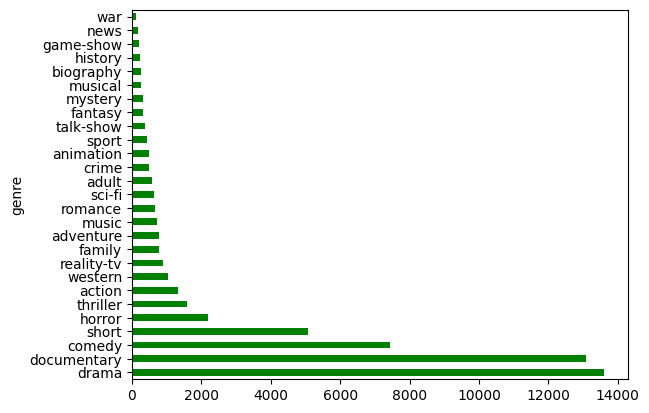

In [ ]:
Y.value_counts().plot(kind="barh",color='green')

In [ ]:
len(X),len(Y)

(54200, 54200)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(X_test_tfidf)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.5832103321033211


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

      action       0.39      0.33      0.36       230
       adult       0.59      0.32      0.42       111
   adventure       0.60      0.23      0.33       150
   animation       0.44      0.14      0.22        98
   biography       0.00      0.00      0.00        53
      comedy       0.51      0.60      0.55      1513
       crime       0.30      0.06      0.11       110
 documentary       0.67      0.85      0.75      2579
       drama       0.55      0.73      0.63      2764
      family       0.54      0.08      0.14       167
     fantasy       0.25      0.04      0.07        74
   game-show       0.81      0.54      0.65        41
     history       0.00      0.00      0.00        42
      horror       0.62      0.52      0.57       474
       music       0.66      0.48      0.56       154
     musical       0.57      0.07      0.13        54
     mystery       1.00      0.02      0.03        60
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Load the new test data from CSV file
test_data_solution = pd.read_csv('/content/drive/MyDrive/archive (1)/Genre Classification Dataset/test_data_solution.txt')

# Preprocess and vectorize the test data
X_new_test_tfidf = tfidf.transform(test_data_solution['description'])

In [ ]:
new_predictions = svm.predict(X_new_test_tfidf)
# Add predictions to the test data
test_data_solution['predicted_genre'] = new_predictions

# Save the test data with predictions
test_data_solution.to_csv('test_data_solution_with_predictions.csv', index=False)

# Display the first few rows of the dataframe with predictions
print(test_data_solution.head())

# Evaluate the prediction score (assuming the true labels are available in the 'genre' column)
if 'genre' in test_data_solution.columns:
    accuracy = accuracy_score(test_data_solution['genre'], test_data_solution['predicted_genre'])
    print(f'New Test Data Accuracy: {accuracy}')
    print(f'New Test Data Classification Report:\n{classification_report(test_data_solution['genre'], test_data_solution['predicted_genre'])}')
else:
    print("The 'genre' column is not available in the test data. Unable to compute prediction score.")